<a href="https://colab.research.google.com/github/purirajan/Black-Scholes-equation-for-European-style-option/blob/main/ColverStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance==0.1.67
#!pip install pandas==1.3.3

     |████████████████████████████████| 6.4 MB 40.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
clover = yf.Ticker("CLOV")
clover_info=clover.info
clover_info

{'52WeekChange': -0.5204359,
 'SandP52WeekChange': 0.14403355,
 'address1': '725 Cool Springs Blvd',
 'address2': 'Suite 300',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 3.54,
 'askSize': 45100,
 'averageDailyVolume10Day': 13492050,
 'averageVolume': 15887829,
 'averageVolume10days': 13492050,
 'beta': None,
 'beta3Year': None,
 'bid': 3.51,
 'bidSize': 28000,
 'bookValue': 1.137,
 'category': None,
 'circulatingSupply': None,
 'city': 'Franklin',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 3.52,
 'currentRatio': 2.02,
 'dateShortInterest': 1647302400,
 'dayHigh': 3.595,
 'dayLow': 3.45,
 'debtToEquity': 5.16,
 'dividendRate': None,
 'dividendYield': None,
 'earningsGrowth': None,
 'earningsQuarterlyGrowth': None,
 'ebitda': -635745984,
 'ebitdaMargins': -0.46699002,
 'enterpriseToEbitda': -1.702,
 'enterpriseToRevenue': 0.795,
 'enterpriseValue': 1082347008,
 'exDividendDate': None,
 'ex

In [ ]:
clov_share_price_data = clover.history(period="max")
clov_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-12,10.07,10.333,10.070,10.20,1441900,0,0
2020-06-15,10.25,10.500,10.192,10.33,212300,0,0
2020-06-16,11.36,11.360,10.250,10.40,410300,0,0
2020-06-17,10.50,10.600,10.390,10.50,403600,0,0
2020-06-18,10.40,10.770,10.350,10.60,130400,0,0


In [ ]:
clov_share_price_data=clov_share_price_data.drop('Dividends', axis=1)

In [ ]:
clov_share_price_data=clov_share_price_data.drop('Stock Splits', axis=1)

In [ ]:
clov_share_price_data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-03-21,3.48,3.620,3.37,3.43,11579800
2022-03-22,3.47,3.680,3.40,3.55,11820100
2022-03-23,3.52,3.850,3.48,3.74,17294200
2022-03-24,3.82,3.820,3.50,3.61,13830100
2022-03-25,3.58,3.595,3.45,3.52,7479300


In [ ]:
clov_share_price_data.reset_index(inplace=True)

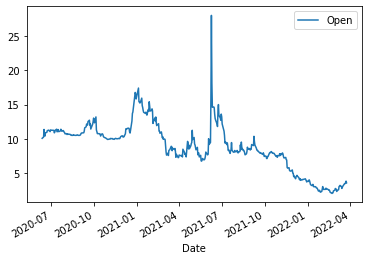

In [ ]:
clov_share_price_data.plot(x="Date", y="Open")

In [ ]:
clov_share_price_data.shape

(451, 6)

In [ ]:
clov_share_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    451 non-null    datetime64[ns]
 1   Open    451 non-null    float64       
 2   High    451 non-null    float64       
 3   Low     451 non-null    float64       
 4   Close   451 non-null    float64       
 5   Volume  451 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 21.3 KB


In [ ]:
clov_share_price_data.describe()

,Open,High,Low,Close,Volume
count,451.000000,451.000000,451.000000,451.000000,4.510000e+02
mean,8.886195,9.178792,8.546933,8.809701,1.974868e+07
std,3.501587,3.677539,3.253134,3.388855,4.641847e+07
min,2.030000,2.110000,1.950000,2.010000,1.297000e+05
25%,7.405000,7.642500,7.172500,7.380000,3.893800e+06
50%,9.079000,9.350000,8.545000,8.875000,1.108670e+07
75%,10.995000,11.200000,10.630000,10.940000,1.948055e+07
max,28.000000,28.850000,16.799999,22.150000,7.354837e+08


In [ ]:
clov_share_price_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
clov_share_price_data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

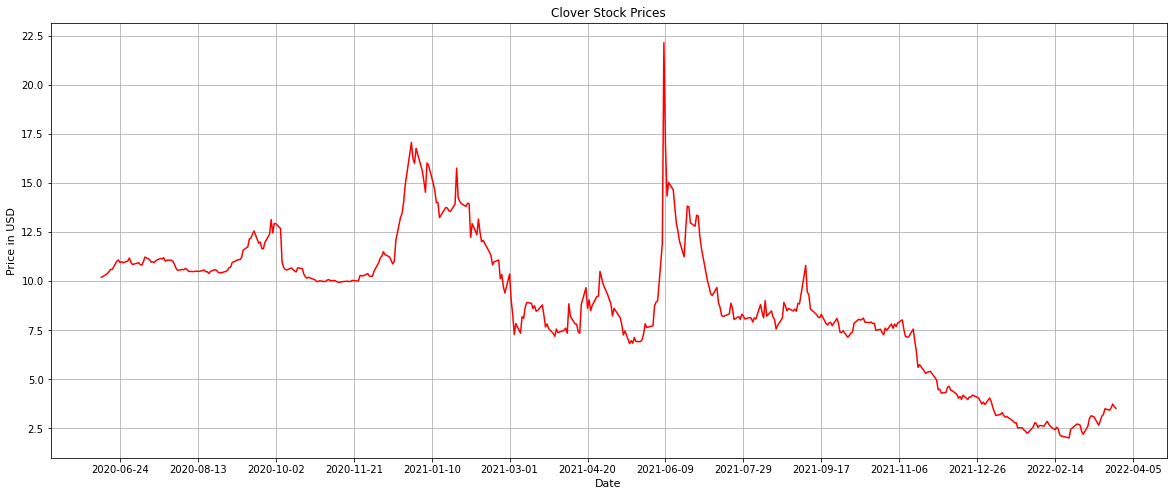

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(clov_share_price_data['Date'], clov_share_price_data['Close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Clover Stock Prices')
plt.grid()
plt.show()


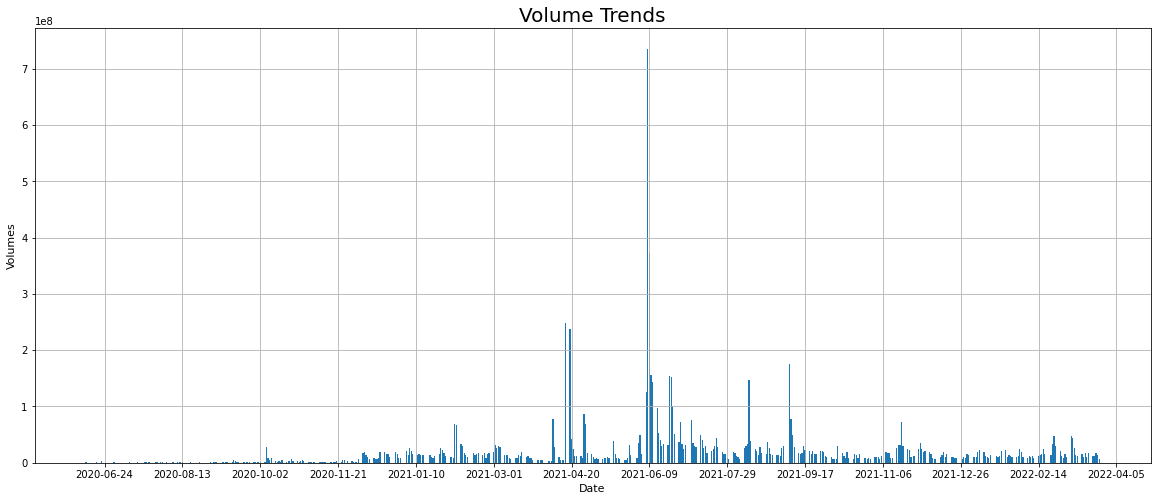

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(clov_share_price_data['Date'], clov_share_price_data['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends', fontsize='20')
plt.grid()
plt.show()


In [ ]:
clov_share_price_data['Market Cap'] = clov_share_price_data['Open']*clov_share_price_data['Volume']

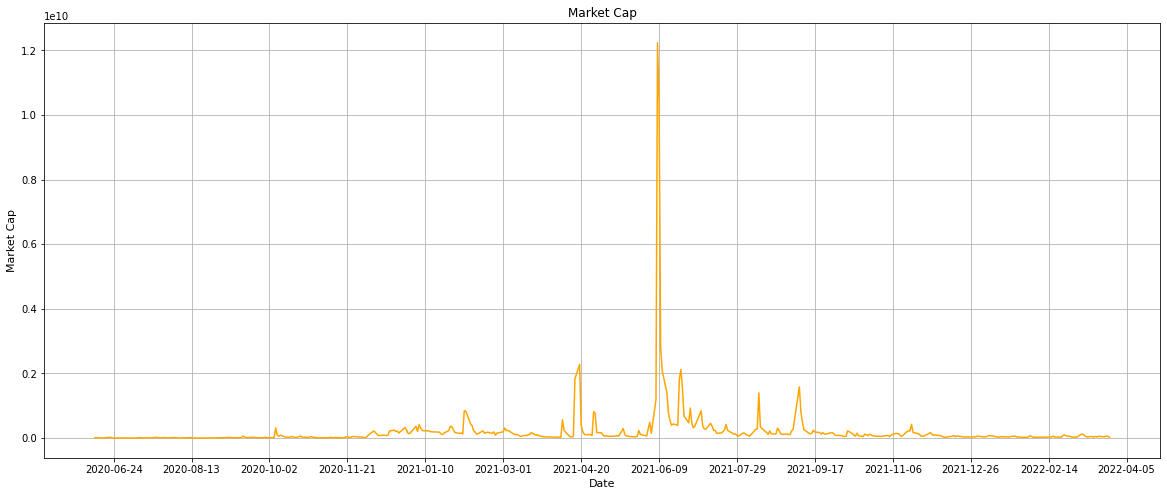

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(clov_share_price_data['Date'], clov_share_price_data['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap')
plt.grid()
plt.show()


In [ ]:
clov_share_price_data.iloc[clov_share_price_data['Market Cap'].argmax()]

Date          2021-06-08 00:00:00
Open                       16.635
High                        24.93
Low                         16.32
Close                       22.15
Volume                  735483700
Market Cap      12234771517.83886
Name: 248, dtype: object

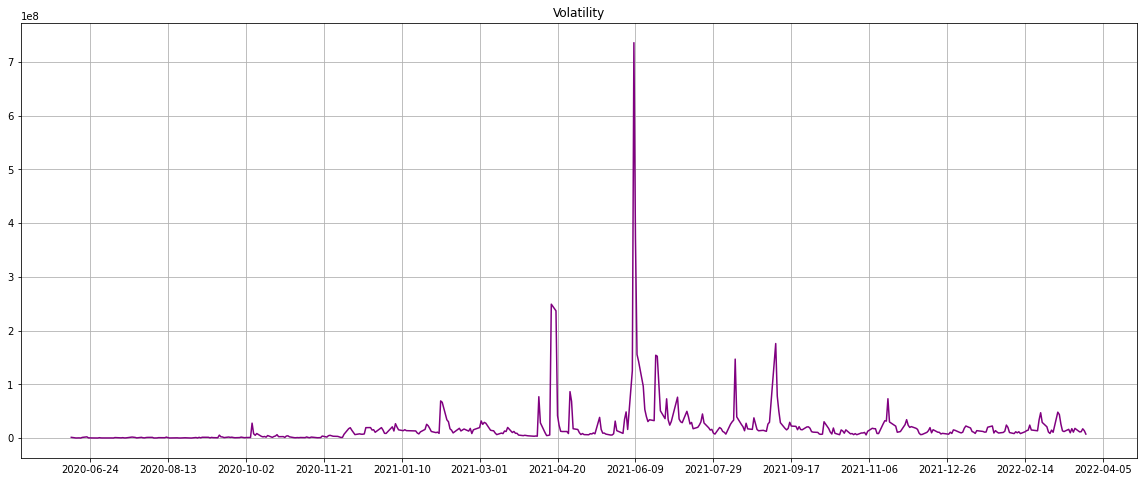

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(clov_share_price_data['Date'], clov_share_price_data['Volume'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility')
plt.grid()
plt.show()


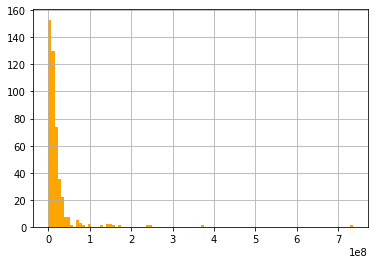

In [ ]:
clov_share_price_data['Volume'].hist(bins=100, color='orange');


In [ ]:
clov_share_price_data['Cumulative Return'] = (1 + clov_share_price_data['Volume']).cumprod()

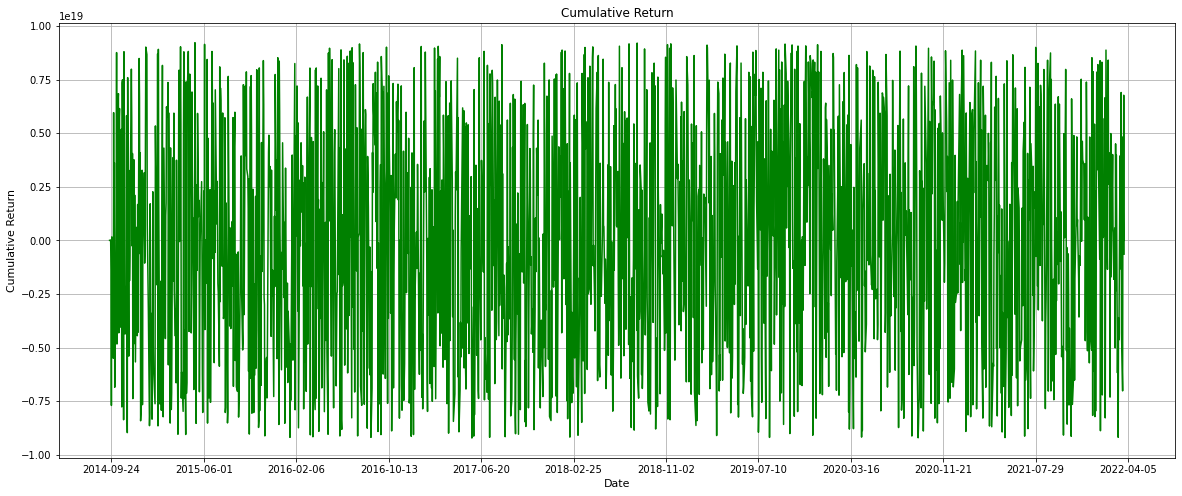

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(clov_share_price_data['Date'], clov_share_price_data['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.title('Cumulative Return')
plt.grid()
plt.show()

In [ ]:
clov_share_price_data.iloc[clov_share_price_data['Cumulative Return'].argmax()]


Date                 2021-04-08 00:00:00
Open                                7.35
High                                9.23
Low                                 7.12
Close                               8.85
Volume                          76990700
Market Cap              565881637.657595
Cumulative Return    9170321065904871269
Name: 206, dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [ ]:
clov_share_price_data['Date'] = pd.to_datetime(clov_share_price_data['Date'])
clov_share_price_data.set_index('Date',inplace=True)

In [ ]:
data = clov_share_price_data.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len


361

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.40665342],
       [0.41310825],
       [0.4165839 ],
       [0.42154916],
       [0.42651443],
       [0.42651443],
       [0.44736845],
       [0.45034757],
       [0.44389275],
       [0.44587885],
       [0.44339621],
       [0.44786494],
       [0.45531283],
       [0.44438929],
       [0.43892753],
       [0.44339621],
       [0.438431  ],
       [0.43743793],
       [0.44587885],
       [0.45779542],
       [0.45134064],
       [0.44488582],
       [0.44587885],
       [0.44389275],
       [0.44885801],
       [0.45431976],
       [0.4528302 ],
       [0.45630586],
       [0.44736845],
       [0.44985104],
       [0.44985104],
       [0.44637538],
       [0.43892753],
       [0.42899701],
       [0.4240318 ],
       [0.42651443],
       [0.42552136],
       [0.42899701],
       [0.42651443],
       [0.42154916],
       [0.42105263],
       [0.42154916],
       [0.4220457 ],
       [0.42154916],
       [0.42154916],
       [0.42502482],
       [0.42105263],
       [0.420

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()



[array([0.40665342, 0.41310825, 0.4165839 , 0.42154916, 0.42651443,
       0.42651443, 0.44736845, 0.45034757, 0.44389275, 0.44587885,
       0.44339621, 0.44786494, 0.45531283, 0.44438929, 0.43892753,
       0.44339621, 0.438431  , 0.43743793, 0.44587885, 0.45779542,
       0.45134064, 0.44488582, 0.44587885, 0.44389275, 0.44885801,
       0.45431976, 0.4528302 , 0.45630586, 0.44736845, 0.44985104,
       0.44985104, 0.44637538, 0.43892753, 0.42899701, 0.4240318 ,
       0.42651443, 0.42552136, 0.42899701, 0.42651443, 0.42154916,
       0.42105263, 0.42154916, 0.4220457 , 0.42154916, 0.42154916,
       0.42502482, 0.42105263, 0.42055609, 0.41608741, 0.42154916,
       0.42601789, 0.4240318 , 0.41906653, 0.41757697, 0.41807351,
       0.42154916, 0.42452833, 0.43098311, 0.43247271, 0.44389275])]
[0.45134064343966945]



In [ ]:
import numpy as np
x_train,y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(301, 60, 1)

In [ ]:
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train, batch_size=1, epochs=10)


Epoch 1/10
301/301 [==============================] - 10s 24ms/step - loss: 0.0082
Epoch 2/10
301/301 [==============================] - 7s 25ms/step - loss: 0.0046
Epoch 3/10
301/301 [==============================] - 7s 24ms/step - loss: 0.0039
Epoch 4/10
301/301 [==============================] - 8s 25ms/step - loss: 0.0036
Epoch 5/10
301/301 [==============================] - 9s 31ms/step - loss: 0.0030
Epoch 6/10
301/301 [==============================] - 7s 25ms/step - loss: 0.0031
Epoch 7/10
301/301 [==============================] - 7s 25ms/step - loss: 0.0028
Epoch 8/10
301/301 [==============================] - 8s 25ms/step - loss: 0.0026
Epoch 9/10
301/301 [==============================] - 7s 25ms/step - loss: 0.0029
Epoch 10/10
301/301 [==============================] - 7s 25ms/step - loss: 0.0026


In [ ]:
test_data= scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape


(90, 60, 1)

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.35496070120069717

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'upper_center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


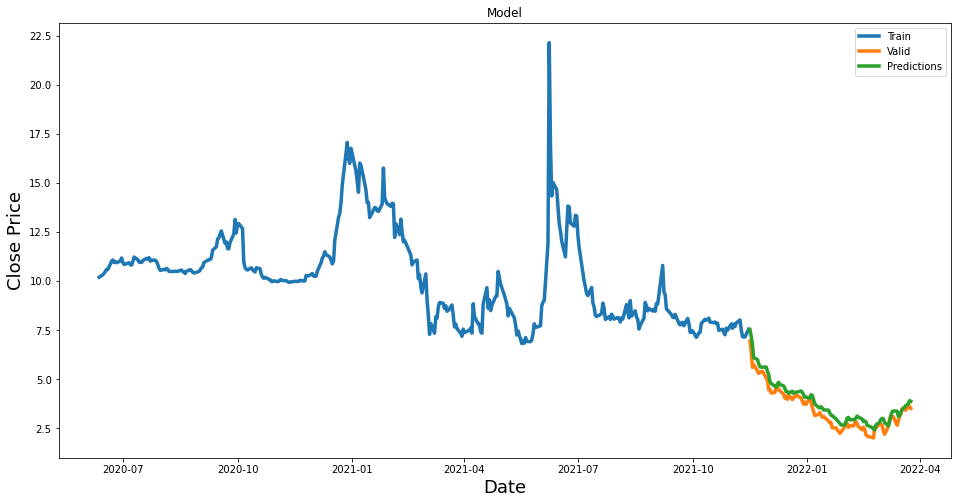

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper_center')

In [ ]:
valid

,Close,Predictions
Date,,
2021-11-16,6.94,7.534990
2021-11-17,6.43,7.196416
2021-11-18,5.61,6.752127
2021-11-19,5.75,6.103721
2021-11-22,5.43,6.005844
...,...,...
2022-03-21,3.43,3.666058
2022-03-22,3.55,3.696708
2022-03-23,3.74,3.768007


In [ ]:
clov_quote = clov_share_price_data
new_clov_data = clov_quote.filter(['Close'])
last_60_days = new_clov_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
pred_price= model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[3.8161252]], dtype=float32)